# **ANALISI DEI DATI**

## **I. Importazione Datasets da MongoDB**

In [ ]:
#Expost dati da MongoDB a file formato json
from bson.json_util import dumps
from pymongo import MongoClient
import json

#se usi vm sostituisci localhost con "mongo"
#scrive un documento in formato json
if __name__ == '__main__':
    client = MongoClient('localhost', 27017)
    db = client.progettoPSY
    collection = db.concertone
    cursor = collection.find({})
    with open('progettoPSY_concertone.json', 'w') as file:
        for document in cursor:
            file.write(dumps(document))
            file.write('\n')

In [ ]:
#Estrazione DataFrame e creazione file csv di backup
import pandas as pd
from tqdm.notebook import tqdm
pbar = tqdm(total=105347)

#creazione pandas dataframe dal documento json creato in precedenza
with open('progettoPSY_concertone.json','r') as file:
    for i,document in enumerate(file):
        if i==0:
            concertone_1=pd.json_normalize(json.loads(document))
        else:
            concertone_1=pd.concat([concertone_1,pd.json_normalize(json.loads(document))],ignore_index=True)
        pbar.update(n=1)

In [ ]:
#NB ripetere i due chunk superiori per la collection MongoDB relativa alla raccolta Artisti

In [ ]:
df_concertone.to_csv('df_concertone.csv')
df_artisti.to_csv('df_artisti.csv')

In [1]:
import pandas as pd
df_artisti=pd.read_csv('df_artisti.csv')

C:\Users\Eric\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (28,29) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df_concertone=pd.read_csv('df_concertone.csv')

In [3]:
print(df_artisti.shape)
print(df_concertone.shape)

(82805, 30)
(105347, 32)


In [4]:
df_totale=pd.concat([df_concertone,df_artisti])

In [5]:
df_totale.shape

(188152, 32)

In [6]:
df_totale1=df_totale.drop_duplicates(subset=['tweet.tweet_id'], keep='first')

In [7]:
df_totale1.shape

(147074, 32)

## **II. Data Cleaning**

In [37]:
from feel_it import EmotionClassifier, SentimentClassifier

import re
import pandas as pd
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import spacy

In [38]:
emotion_classifier=EmotionClassifier()

In [20]:
sentiment_classifier=SentimentClassifier()

In [39]:
#caricamento dizionario completo Spacy italiano
nlp = spacy.load('it_core_news_lg', disable=['parser', 'ner'])

In [41]:
df_2=pd.DataFrame({})

In [44]:
#filtro tweet in italiano
df_2['original_text']=df_totale1[df_totale1['tweet.language']=='it']['tweet.text']

In [45]:
df_2['new_text']=df_2['original_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

df_2['new_text_1']=0

df_2=df_2.reset_index()

In [46]:
df_2=df_2.drop('index',1)

In [47]:
#pulizia da simboli
for i in df_2.index:
    l1=[ t for t in df_2['new_text'][i].split() if t.startswith('#') ]
    l2=[ t for t in df_2['new_text'][i].split() if t.startswith('http') ]
    l3=[ t for t in df_2['new_text'][i].split() if t.startswith('@') ]
    stopword=l1+l2+l3
    querywords=df_2['new_text'][i].split()
    resultwords=[word for word in querywords if word.lower() not in stopword]
    result = ' '.join(resultwords)
    df_2['new_text_1'][i]=result

C:\Users\Eric\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Eric\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [48]:
df_2['new_text_2'] = df_2['new_text_1'].str.replace('[^\w\s]','')

df_2['new_text_3']=0

In [49]:
#pulizia da emoji e lemmatization usando la library Spacy
for i in df_2.index:
    stopword=['u001f600','u0001f64f','u0001f5ff','u0001f300','u0001f680','u0001f6ff','u0001f1e0','u0001f1ff','u00002702','u000027b0','u000024c2','u0001f251']
    querywords=df_2['new_text_2'][i].split()
    resultwords=[word for word in querywords if word.lower() not in stopword]
    result = ' '.join(resultwords)
    df_2['new_text_3'][i]=result

stop = stopwords.words('italian')

df_2['new_text_4'] = df_2['new_text_3'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

def space(comment):
    doc = nlp(comment)
    return " ".join([token.lemma_ for token in doc])

df_2['new_text_5']= df_2['new_text_4'].apply(space)

C:\Users\Eric\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [161]:
#creazione dataset con processamento del testo per tutti i tweet
df_2

,original_text,new_text,new_text_1,new_text_2,new_text_3,new_text_4,new_text_5
0,#Bombardieri: Non si perdano le risorse destin...,#bombardieri: non si perdano le risorse destin...,non si perdano le risorse destinate a questo p...,non si perdano le risorse destinate a questo p...,non si perdano le risorse destinate a questo p...,perdano risorse destinate paese previste ridis...,perdere risorsa destinare paese previsto ridis...
1,#PrimoMaggio. Un giorno di festa che quest’ann...,#primomaggio. un giorno di festa che quest’ann...,un giorno di festa che quest’anno ha un sapore...,un giorno di festa che questanno ha un sapore ...,un giorno di festa che questanno ha un sapore ...,giorno festa questanno sapore diverso speranza...,giorno festa questanno saporire diverso speran...
2,Il concertone c'è anche quest'anno e sta per i...,il concertone c'è anche quest'anno e sta per i...,il concertone c'è anche quest'anno e sta per i...,il concertone cè anche questanno e sta per ini...,il concertone cè anche questanno e sta per ini...,concertone cè questanno iniziare ecco funziona...,concertone cè questanno iniziare ecco funziona...
3,#MaurizioLandini: “Dedico questo #PrimoMaggio ...,#mauriziolandini: “dedico questo #primomaggio ...,"“dedico questo a chi un lavoro non ce l’ha, a ...",dedico questo a chi un lavoro non ce lha a chi...,dedico questo a chi un lavoro non ce lha a chi...,dedico lavoro ce lha lha perso anno durissimo ...,dedicare lavorare ce lha lha perdere anno duri...
4,Questa mattina @Fedez e @francescacheeks ci ha...,questa mattina @fedez e @francescacheeks ci ha...,questa mattina e ci hanno fatto davvero emozio...,questa mattina e ci hanno fatto davvero emozio...,questa mattina e ci hanno fatto davvero emozio...,mattina fatto davvero emozionare pronti vederl...,mattina fare davvero emozionare pronto vederli...
...,...,...,...,...,...,...,...
133531,la Rai e i leghisti in questo momento:\n#Fedez...,la rai e i leghisti in questo momento: #fedez ...,la rai e i leghisti in questo momento: grazie ❤️,la rai e i leghisti in questo momento grazie,la rai e i leghisti in questo momento grazie,rai leghisti momento grazie,rai leghista momento grazia
133532,Leone hai un grande papà: ma proprio grande gr...,leone hai un grande papà: ma proprio grande gr...,leone hai un grande papà: ma proprio grande gr...,leone hai un grande papà ma proprio grande gra...,leone hai un grande papà ma proprio grande gra...,leone grande papà proprio grande grande molto ...,leone grande papà proprio grande grande molto ...
133533,Ma chi cazzo è #Fedez?,ma chi cazzo è #fedez?,ma chi cazzo è,ma chi cazzo è,ma chi cazzo è,cazzo,cazzo
133534,Io pago il canone Rai e voglio che #Fedez dica...,io pago il canone rai e voglio che #fedez dica...,io pago il canone rai e voglio che dica quello...,io pago il canone rai e voglio che dica quello...,io pago il canone rai e voglio che dica quello...,pago canone rai voglio dica pare,pagare canone rai volere dire parere


In [ ]:
#backup
df_2.to_csv('df_2_text_cleaning_totale.csv')

## **III. Applicazione Algoritmi e Grafici**

In [27]:
emotions_3=emotion_classifier.predict(df_2["new_text_3"].values.tolist())

In [196]:
text_emo3=pd.DataFrame({'text':df_2["new_text_3"].values.tolist(),'emotion':emotions_3})

In [32]:
text_emo3.to_csv('text_emo3_tot.csv')

In [197]:
text_emo3['hashtags']=df_totale1[df_totale1['tweet.language']=='it']['hashtags'].reset_index().drop('index',1)

In [198]:
text_emo3['timestamp']=df_totale1[df_totale1['tweet.language']=='it']['tweet.timestamp'].reset_index().drop('index',1)

### **Pie Chart**

In [199]:
from collections import Counter
c1=Counter(list(text_emo3['emotion'][0:20600]))

list(c1.values())

[9415, 7935, 2616, 634]

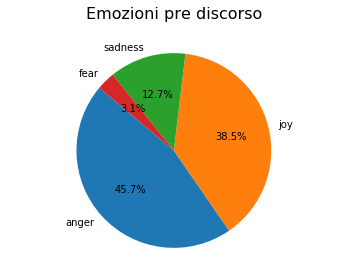

In [653]:
import matplotlib.pyplot as plt
labels = list(c1.keys())
sizes = list(c1.values())
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Emozioni pre discorso\n', fontsize=16)

plt.show()

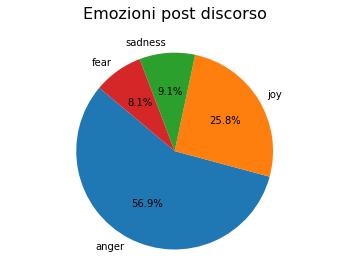

In [654]:
c2=Counter(list(text_emo3['emotion'][20600:]))

labels = list(c2.keys())
sizes = list(c2.values())
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Emozioni post discorso\n', fontsize=16)

plt.show()

### **Area Chart**

In [202]:
#ultimo Tweet del 5/01
text_emo3[text_emo3.index==129806]

,text,emotion,hashtags,timestamp
129806,se una battaglia la deve fare che fa il stiamo...,anger,"['politica', 'fedez', 'cantante']",23:59:59


In [126]:
#creazione dataset per numerosità cumulata ogni 5 minuti
df_1=text_emo3[['timestamp','text']]

import time
from datetime import datetime, timedelta

for i in df_1.index:
    if i<129807:
        df_1['timestamp'][i]=datetime.strptime("2021-05-01 "+text_emo3['timestamp'][i], "%Y-%m-%d %H:%M:%S")
    else:
        df_1['timestamp'][i]=datetime.strptime("2021-05-02 "+text_emo3['timestamp'][i], "%Y-%m-%d %H:%M:%S")

timestamp=datetime.strptime("2021-05-01 "+text_emo3['timestamp'][0], "%Y-%m-%d %H:%M:%S")
timestamp_end=datetime.strptime("2021-05-02 "+text_emo3['timestamp'][133535], "%Y-%m-%d %H:%M:%S") + timedelta(minutes=20)

start=[]
end=[]
count=[]

while timestamp<timestamp_end:
    
    start.append(timestamp)
    end.append(timestamp + timedelta(minutes=5))
    count.append(df_1['timestamp'].between(timestamp, timestamp + timedelta(minutes=5)).sum())
    
    timestamp=timestamp + timedelta(minutes=5)

In [203]:
df_1['hashtags']=text_emo3['hashtags']

In [204]:
df_1

,timestamp,text,boolean,hashtags
0,2021-05-01 14:14:31,non si perdano le risorse destinate a questo p...,False,"['Bombardieri', 'RecoveryPlan']"
1,2021-05-01 14:15:08,un giorno di festa che questanno ha un sapore ...,False,['PrimoMaggio']
2,2021-05-01 14:15:18,il concertone cè anche questanno e sta per ini...,False,[]
3,2021-05-01 14:15:22,dedico questo a chi un lavoro non ce lha a chi...,False,"['MaurizioLandini', 'PrimoMaggio']"
4,2021-05-01 14:15:23,questa mattina e ci hanno fatto davvero emozio...,False,[]
...,...,...,...,...
133531,2021-05-02 00:28:12,la rai e i leghisti in questo momento grazie,False,['Fedez']
133532,2021-05-02 00:28:12,leone hai un grande papà ma proprio grande gra...,False,"['Fedez', 'concertoprimomaggio']"
133533,2021-05-02 00:28:12,ma chi cazzo è,False,['Fedez']
133534,2021-05-02 00:28:12,io pago il canone rai e voglio che dica quello...,False,['Fedez']


In [205]:
#creazione dataframe di dataframe con numerosità cumulata ogni 5 minuti relativamente a ciascun artista
hashtags=["comacose","ghemon","fasma","fedez","francescamichielin","giannanannini","antonellovenditti","alexbritti","Flavioboltro","sudsoundsystem","Balthazar","EdoardoBennato","Bugo","ChadiaRodriguez","colapesce","EnricoRuggeri","ErmalMeta","ExtraLiscio","williepeyote","folcast","francescorenga","Gaia","ClaudioCapeo","ginevradimarco","gioevan","orchestraccia","larappresentantedilista","LP","marasattei","maxgazzè","michelebravi","MCR","nayt","Noemi","Arezzo","PieroPelù","TheZenCircus","tarm","vascobrondi","Cargo","martemarasco","neno"]

dict_of_df2 = {}

for hashtag in hashtags:
    
    df_3=df_1
    
    boolean=[]
    
    for i in range(0,len(df_1)):
        boolean.append((hashtag.lower() in str(df_3[df_3.index==i]['text']).lower()) | (hashtag.lower() in str(df_3[df_3.index==i]['hashtags'])))
        
    df_3['boolean']=pd.Series(boolean)
    
    df_hash=df_3[df_3.boolean == True]
    
    timestamp=datetime.strptime("2021-05-01 "+text_emo3['timestamp'][0], "%Y-%m-%d %H:%M:%S")
    timestamp_end=datetime.strptime("2021-05-02 "+text_emo3['timestamp'][133535], "%Y-%m-%d %H:%M:%S") + timedelta(minutes=20)

    start1=[]
    end1=[]
    count1=[]

    while timestamp<timestamp_end:
    
        start1.append(timestamp)
        end1.append(timestamp + timedelta(minutes=5))
        count1.append(df_hash['timestamp'].between(timestamp, timestamp + timedelta(minutes=5)).sum())
    
        timestamp=timestamp + timedelta(minutes=5)
    
    dict_of_df2["df_{}".format(str(hashtag).replace('#',''))]=pd.DataFrame({'start':start1,'end':end1,'count':count1})

In [206]:
counter=[]
for i in list(dict_of_df2.keys()):
    counter.append(dict_of_df2[i]['count'].sum())

df_top=pd.DataFrame({'hashtag':list(dict_of_df2.keys()),'count':counter}).sort_values(by='count',ascending=False).reset_index()

df_top=df_top[(df_top['hashtag']!='df_ErmalMeta') & (df_top['hashtag']!='df_noemi')]

In [208]:
#filtro la numerosità totale per periodo relativa a tutti gli artisti tranne Fedez
import numpy as np
lista1=list(np.repeat(0,len(end)))

for key in list(dict_of_df2.keys()):
    if key != 'df_fedez':
        lista2=list(dict_of_df2[key]['count'])
        lista1=[x+y for (x,y) in zip(lista1,lista2)]

In [211]:
df_altri=pd.DataFrame({'start':start,'end':end,'count':lista1})

In [243]:
#correzione orario raccolta
end_corrected=[]

for i in end:
    end_corrected.append(i + timedelta(hours=1))

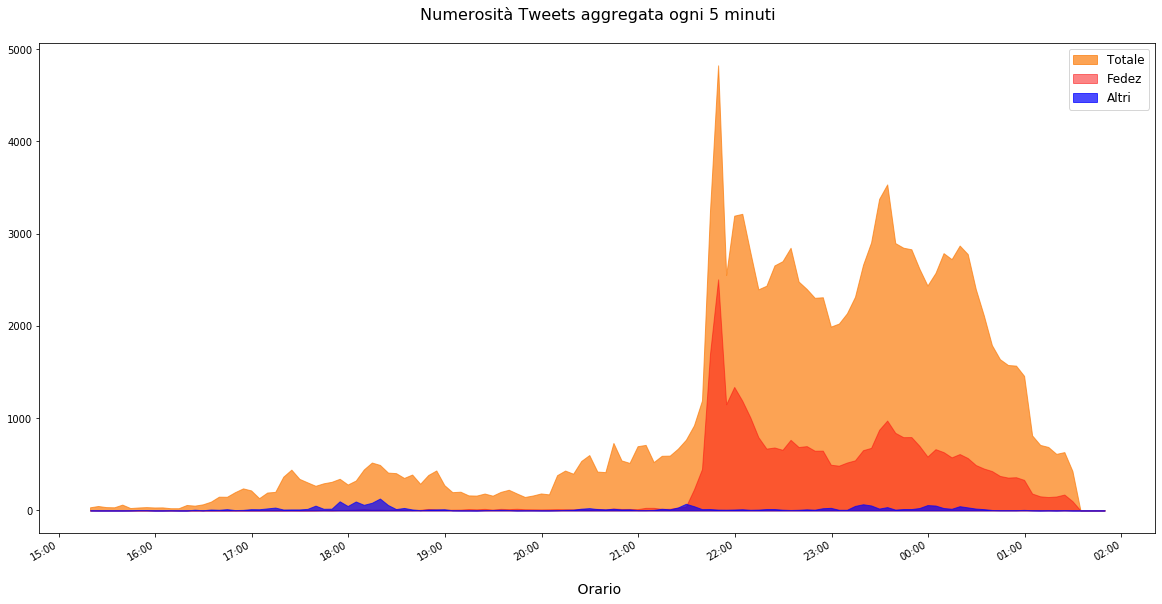

In [674]:
totale = count
altri = df_altri['count']
fedez = dict_of_df2['df_fedez']['count']

fig=plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

plt.fill_between(end_corrected, totale, color="#FB7C0B",
                 alpha=0.7, label='Totale')
plt.fill_between(end_corrected, fedez, color="#FB0B0B",
                 alpha=0.5, label='Fedez')
plt.fill_between(end_corrected, altri, color="blue",
                 alpha=0.7, label='Altri')

import matplotlib.dates as mdates
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))

# rotate and align the tick labels so they look better
fig.autofmt_xdate()

plt.title('Numerosità Tweets aggregata ogni 5 minuti\n', fontsize=16)

plt.xlabel('\n Orario', fontsize=14)

plt.legend( prop={'size': 12})
plt.show()

### **Bar chart**

In [131]:
sentiment=[]

for i in list(text_emo3.emotion):
    if (i=='anger') | (i=='fear') | (i=='sadness'):
        sentiment.append('neg')
    else:
        sentiment.append('pos')

In [133]:
text_emo3['sentiment']=pd.Series(sentiment)

In [134]:
#subset positivi
sent3_pos=text_emo3[text_emo3['sentiment']=='pos']

In [141]:
#subset negativi
sent3_neg=text_emo3[text_emo3['sentiment']=='neg']

In [152]:
sent3_pos[sent3_pos.index>129800]

,text,emotion,timestamp,sentiment
129803,le mani tremanti e la voce rotta nonostante gl...,joy,23:59:58,pos
129804,situazione ora,joy,23:59:59,pos
129811,comè umano lui,joy,00:00:00,pos
129821,il signore del concertone il ritorno di,joy,00:00:04,pos
129828,il privilegio,joy,00:00:09,pos
...,...,...,...,...
133503,le mani tremanti e la voce rotta nonostante gl...,joy,00:27:52,pos
133504,fedez è un uomo bianco etero ricco e famoso ch...,joy,00:27:52,pos
133518,fedez è un uomo bianco etero ricco e famoso ch...,joy,00:28:04,pos
133532,leone hai un grande papà ma proprio grande gra...,joy,00:28:12,pos


In [153]:
sent3_neg[sent3_neg.index>129800]

,text,emotion,timestamp,sentiment
129801,con adoro la libertà era partito bene però sap...,sadness,23:59:58,neg
129802,io dopo il discorso di,sadness,23:59:58,neg
129805,la rai che lui che ha accusa registrato la di ...,anger,23:59:59,neg
129806,se una battaglia la deve fare che fa il stiamo...,anger,23:59:59,neg
129807,il successo di salvini si base principalmente ...,sadness,00:00:00,neg
...,...,...,...,...
133529,ti sei dichiarata no vax ma poi per fare lisol...,anger,00:28:10,neg
133530,in poche parole sta facendo il culo a tutti gr...,anger,00:28:11,neg
133531,la rai e i leghisti in questo momento grazie,anger,00:28:12,neg
133533,ma chi cazzo è,anger,00:28:12,neg


In [263]:
#conversione type timestamp
import time
from datetime import datetime, timedelta

sent3_pos['timestamp_1']=0

for i in sent3_pos.index:
    if i<129811:
        sent3_pos['timestamp_1'][i]=datetime.strptime("2021-05-01 "+sent3_pos['timestamp'][i], "%Y-%m-%d %H:%M:%S")
    else:
        sent3_pos['timestamp_1'][i]=datetime.strptime("2021-05-02 "+sent3_pos['timestamp'][i], "%Y-%m-%d %H:%M:%S")

sent3_neg['timestamp_1']=0

for i in sent3_neg.index:
    if i<129807:
        sent3_neg['timestamp_1'][i]=datetime.strptime("2021-05-01 "+sent3_neg['timestamp'][i], "%Y-%m-%d %H:%M:%S")
    else:
        sent3_neg['timestamp_1'][i]=datetime.strptime("2021-05-02 "+sent3_neg['timestamp'][i], "%Y-%m-%d %H:%M:%S")

C:\Users\Eric\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Eric\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Eric\anaconda3\lib\site-packages\pandas\core\series.py:1092: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set

In [268]:
#aggregazione ogni 15 minuti subset positivi
timestamp=datetime.strptime("2021-05-01 "+sent3_pos['timestamp'][1], "%Y-%m-%d %H:%M:%S")
timestamp_end=datetime.strptime("2021-05-02 "+sent3_pos['timestamp'][133535], "%Y-%m-%d %H:%M:%S") + timedelta(minutes=20)

start2=[]
end2=[]
count2=[]

while timestamp<timestamp_end:
    
    start2.append(timestamp)
    end2.append(timestamp + timedelta(minutes=15))
    count2.append(sent3_pos['timestamp_1'].between(timestamp, timestamp + timedelta(minutes=15)).sum())
    
    timestamp=timestamp + timedelta(minutes=15)

#aggregazione ogni 15 minuti subset negativi
timestamp=datetime.strptime("2021-05-01 "+sent3_neg['timestamp'][0], "%Y-%m-%d %H:%M:%S")
timestamp_end=datetime.strptime("2021-05-02 "+sent3_neg['timestamp'][133533], "%Y-%m-%d %H:%M:%S") + timedelta(minutes=20)

start3=[]
end3=[]
count3=[]

while timestamp<timestamp_end:
    
    start3.append(timestamp)
    end3.append(timestamp + timedelta(minutes=15))
    count3.append(sent3_neg['timestamp_1'].between(timestamp, timestamp + timedelta(minutes=15)).sum())
    
    timestamp=timestamp + timedelta(minutes=15)

In [269]:
df2=pd.DataFrame({'start':start2,'end':end2,'positive':count2}).reset_index()
df3=pd.DataFrame({'start':start3,'end':end3,'negative':[ -x for x in count3]}).reset_index()

In [270]:
#correzione data
end2_corrected=[]

for i in end2:
    end2_corrected.append((i+timedelta(hours=1)).strftime("%H:%M"))

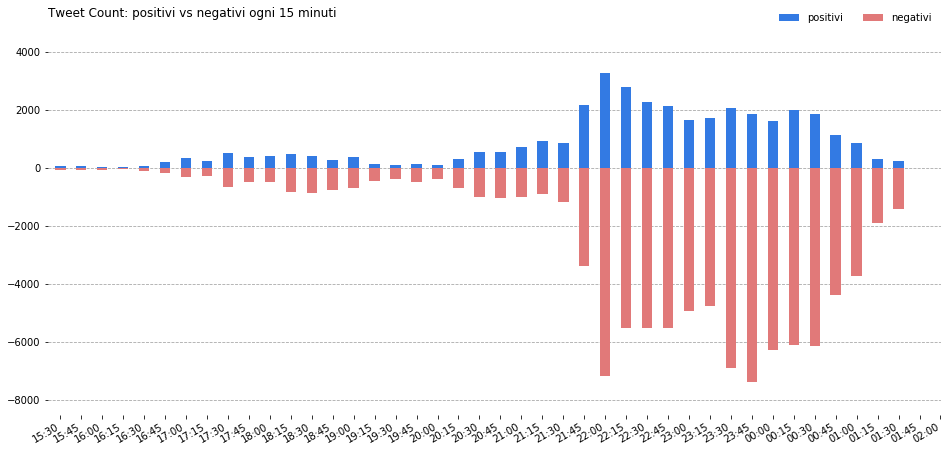

In [276]:
fig, ax = plt.subplots(1, figsize=(16, 8))
plt.bar(df2.index, df2['positive'], color = '#337AE3', width =0.5)
plt.bar(df3.index, df3['negative'], color = '#E17979', width =0.5)

plt.xlim(-0.6, 10.5)
plt.ylim(-8500, 5000)

# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#grid
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.7)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))

# x ticks
xticks_labels = end2_corrected
plt.xticks(df2.index , labels = xticks_labels)



# rotate and align the tick labels so they look better
fig.autofmt_xdate()

# title and legend
legend_label = ['positivi', 'negativi']
plt.legend(legend_label, ncol = 4, bbox_to_anchor=([1, 1.05, 0, 0]), frameon = False)
plt.title('Tweet Count: positivi vs negativi ogni 15 minuti', loc='left')
plt.show()

### **World Cloud**

In [162]:
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

words=df_2['new_text'].reset_index().drop('index',1)
stop = stopwords.words('italian')

In [163]:
def space(comment):
    doc = nlp(comment)
    return " ".join([token.lemma_ for token in doc])

In [167]:
#rimozione caratteri speciali, stopwords, hyperlink, punteggiatura
words['new_text_1']=0

for i in range(0,len(words.new_text)):
    l1=[ t for t in words['new_text'][i].split() if t.startswith('http') ]
    stopword=l1+stop
    querywords=words['new_text'][i].split()
    resultwords=[word for word in querywords if word.lower() not in stopword]
    result = ' '.join(resultwords)
    result=result.replace('[^\w\s]','')
    result=result.translate ({ord(c): "" for c in "!@#$%^&*()[]{};:,./<>?\|`~-=_+"})
    words['new_text_1'][i]=result

C:\Users\Eric\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Eric\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [168]:
#lemmatization
words['new_text_2']= words['new_text_1'].apply(space)

In [169]:
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [282]:
sent3_pos_bkp=sent3_pos

In [284]:
sent3_pos['new_text']=sent3_pos['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

sent3_pos['new_text_1']=0

sent3_pos=sent3_pos.reset_index()

C:\Users\Eric\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Eric\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [285]:
words3_pos=sent3_pos['new_text'].reset_index().drop('index',1)
stop = stopwords.words('italian')

In [292]:
words3_pos['new_text_1']=0

for i in range(0,len(words3_pos.new_text)):
    l1=[ t for t in words3_pos['new_text'][i].split() if t.startswith('http') ]
    stopword=l1+stop
    querywords=words3_pos['new_text'][i].split()
    resultwords=[word for word in querywords if word.lower() not in stopword]
    result = ' '.join(resultwords)
    result=result.replace('[^\w\s]','')
    result=result.translate ({ord(c): "" for c in "!@#$%^&*()[]{};:,./<>?\|`~-=_+"})
    words3_pos['new_text_1'][i]=result

C:\Users\Eric\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Eric\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [293]:
words3_pos['new_text_2']= words3_pos['new_text_1'].apply(space)

In [333]:
words3_pos[words3_pos.index==7800]

,new_text,new_text_1,new_text_2
7800,tranquillo fedez noi siamo on your left,tranquillo fedez on your left,tranquillare fedez on your left


In [335]:
pre_fedez_pos=words3_pos['new_text_2'].iloc[0:7800,]
post_fedex_pos=words3_pos['new_text_2'].iloc[7800:,]

In [336]:
#creazione lista positiva POST e PRE intervento, lista negativa POST e PRE intervento
listone_pre_pos=' '.join(pre_fedez_pos)
listone_post_pos=' '.join(post_fedex_pos)

In [337]:
listone_pre_pos= deEmojify(listone_pre_pos)
listone_post_pos= deEmojify(listone_post_pos)

In [407]:
#creazione wordcloud con calibrazione dei parametri
wordcloud_pre_pos = WordCloud(width = 2000, height = 1000, random_state=1, prefer_horizontal=1,
                              background_color='white', colormap='Set2', 
                              collocations=False,max_words=75,relative_scaling=0.5,
                              stopwords=['potere','essere','salutatm','dovere','concertone','ogni','tre','1m2021','poi','cè','me','qui','lamore','volere','fare','cosa','1m2o21','stare','primomaggioroma','primo','primomaggio2021','primomaggio','maggio','costatare','l','e','mai','così','piare','1maggio2021','1maggio','concertoprimomaggio','tutto','ciò','avere','mondare',"c'"]).generate(listone_pre_pos)


In [408]:
wordcloud_post_pos = WordCloud(width = 2000, height = 1000, random_state=1, prefer_horizontal=1,
                               background_color='white', colormap='Set2',
                               collocations=False,max_words=75,relative_scaling=.5,
                               stopwords=['potere','essere','dovere','salutatm','concertone','ogni','tre','1m2021','cè','me','poi','qui','lamore','volere','fare','cosa','1m2o21','stare','primomaggioroma','primo','primomaggio2021','primomaggio','maggio','costatare','l','e','mai','così','piare','1maggio2021','1maggio','concertoprimomaggio','tutto','ciò','avere','mondare',"c'"]).generate(listone_post_pos)

In [339]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(20, 10))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off")

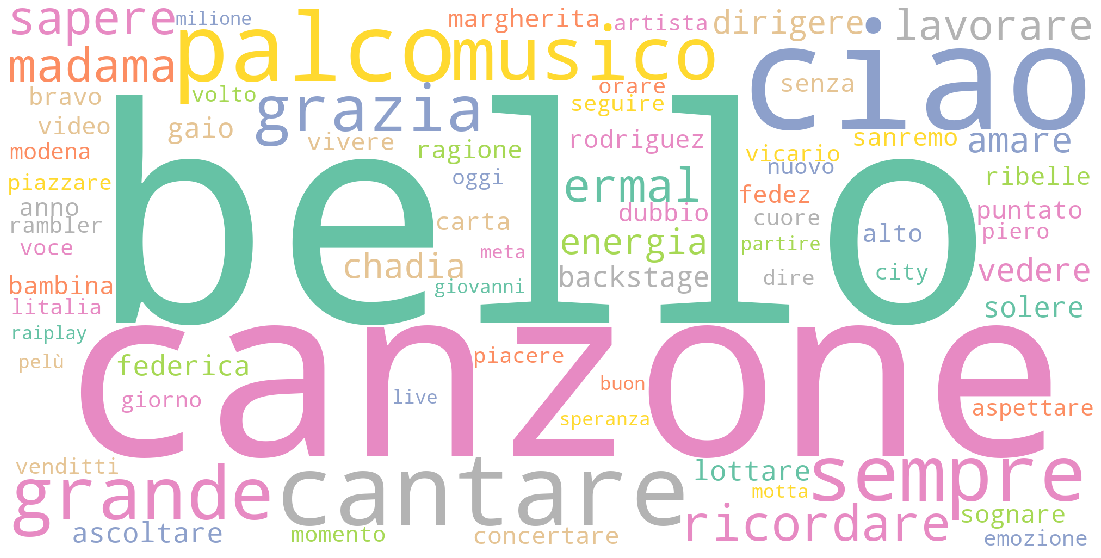

In [409]:
plot_cloud(wordcloud_pre_pos)

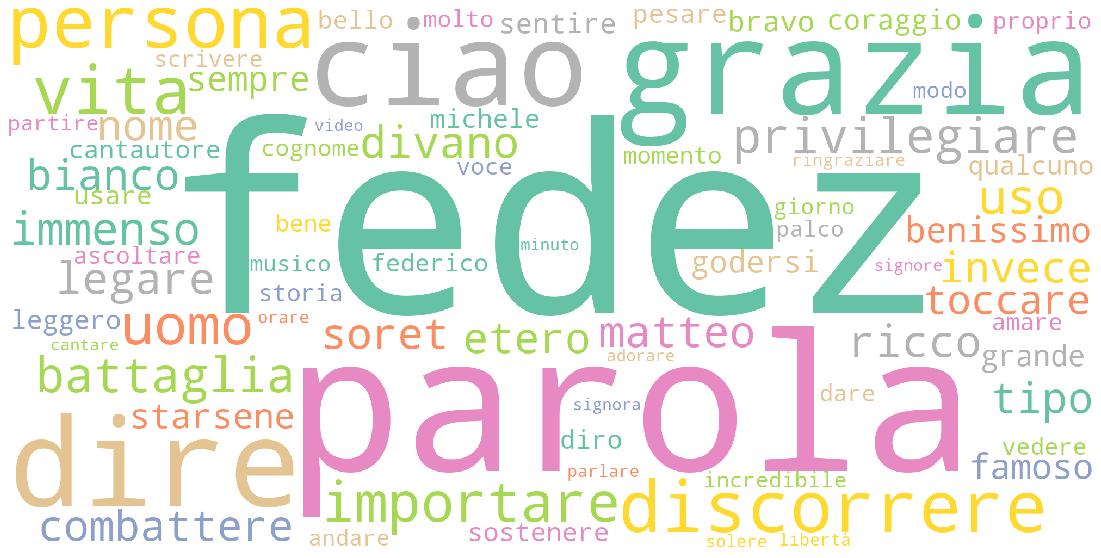

In [410]:
plot_cloud(wordcloud_post_pos)

In [ ]:
#negativi

In [294]:
sent3_neg_bkp=sent3_neg

In [296]:
sent3_neg['new_text']=sent3_neg['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

sent3_neg['new_text_1']=0

sent3_neg=sent3_neg.reset_index()

C:\Users\Eric\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Eric\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [297]:
words3_neg=sent3_neg['new_text'].reset_index().drop('index',1)
stop = stopwords.words('italian')

In [298]:
#ripeto il processo per i tweet negativi
words3_neg['new_text_1']=0

for i in range(0,len(words3_neg.new_text)):
    l1=[ t for t in words3_neg['new_text'][i].split() if t.startswith('http') ]
    stopword=l1+stop
    querywords=words3_neg['new_text'][i].split()
    resultwords=[word for word in querywords if word.lower() not in stopword]
    result = ' '.join(resultwords)
    result=result.replace('[^\w\s]','')
    result=result.translate ({ord(c): "" for c in "!@#$%^&*()[]{};:,./<>?\|`~-=_+"})
    words3_neg['new_text_1'][i]=result

C:\Users\Eric\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [299]:
words3_neg['new_text_2']= words3_neg['new_text_1'].apply(space)

In [411]:
words3_neg[words3_neg.index==12501]

,new_text,new_text_1,new_text_2
12501,ipnotizzata dalla voce di colapesce e dimartino,ipnotizzata voce colapesce dimartino,ipnotizzare voce colapesce dimartino


In [467]:
sent3_neg[sent3_neg.index==12501]

,index,text,emotion,timestamp,sentiment,timestamp_1,new_text,new_text_1
12501,20301,ipnotizzata dalla voce di colapesce e dimartino,anger,20:26:30,neg,2021-05-01 20:26:30,ipnotizzata dalla voce di colapesce e dimartino,0


In [414]:
pre_fedez_neg=words3_neg['new_text_2'].iloc[0:7800,]
post_fedex_neg=words3_neg['new_text_2'].iloc[7800:,]

listone_pre_neg=' '.join(pre_fedez_neg)
listone_post_neg=' '.join(post_fedex_neg)

listone_pre_neg= deEmojify(listone_pre_neg)
listone_post_neg= deEmojify(listone_post_neg)

In [461]:
wordcloud_pre_neg = WordCloud(width = 2000, height = 1000, random_state=2, prefer_horizontal=1,
                              background_color='black', colormap='Set2', 
                              collocations=False,max_words=75,relative_scaling=.5,
                              stopwords=['potere','essere','salutatm','dovere','concertone','ogni','tre','1m2021','poi','cè','me','qui','lamore','volere','fare','cosa','1m2o21','stare','primomaggioroma','primo','primomaggio2021','primomaggio','maggio','costatare','l','e','mai','così','piare','1maggio2021','1maggio','concertoprimomaggio','tutto','ciò','avere','mondare',"c'"]).generate(listone_pre_neg)


wordcloud_post_neg = WordCloud(width = 2000, height = 1000, random_state=2, prefer_horizontal=1,
                               background_color='black', colormap='Set2',
                               collocations=False,max_words=75,relative_scaling=.5,
                               stopwords=['potere','essere','dovere','salutatm','concertone','ogni','tre','1m2021','cè','me','poi','qui','lamore','volere','fare','cosa','1m2o21','stare','primomaggioroma','primo','primomaggio2021','primomaggio','maggio','costatare','l','e','mai','così','piare','1maggio2021','1maggio','concertoprimomaggio','tutto','ciò','avere','mondare',"c'"]).generate(listone_post_neg)

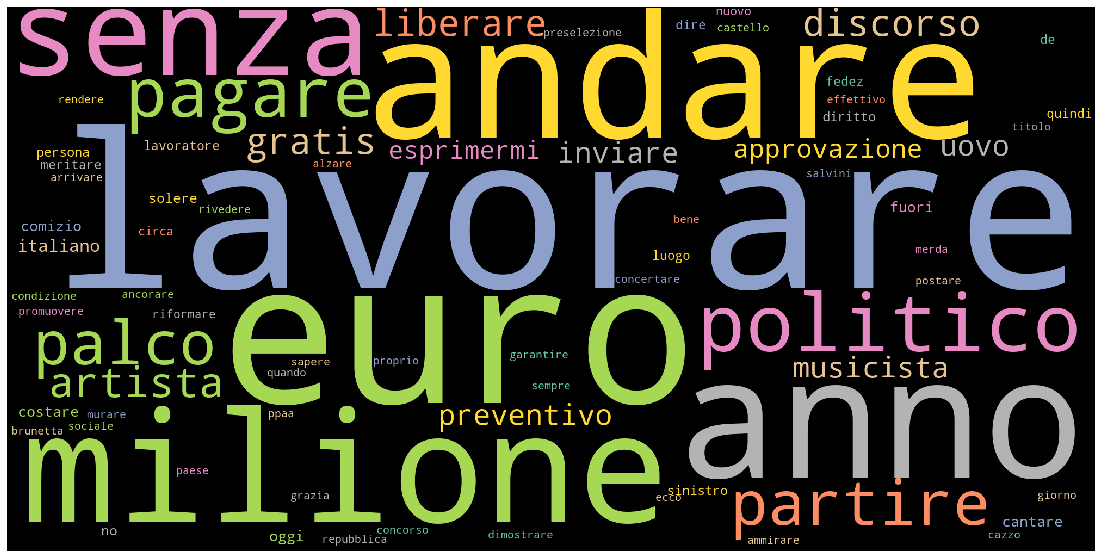

In [462]:
plot_cloud(wordcloud_pre_neg)

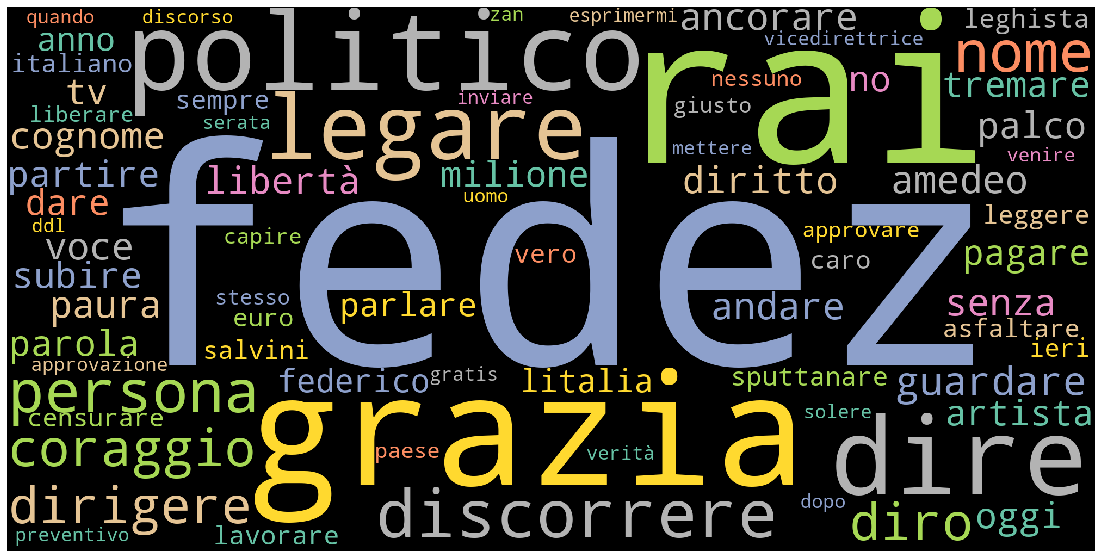

In [463]:
plot_cloud(wordcloud_post_neg)

### **Emoji Analysis**

In [469]:
words_pre=words.iloc[:20301,]

In [470]:
words_post=words.iloc[20301:,]

In [473]:
import emoji
import re

In [487]:
#creazione funzione che individua emoji
def Emojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.findall(text)

In [678]:
emo_list2=[]

for i in words_pre['new_text']:
    #lista=i.split()
    #list_emoji = [Emojify(i) for x in lista]
    lista=emoji.get_emoji_regexp().split(i)
    list_emoji=[Emojify(x) for x in lista]
    emo_list2.append(list_emoji)


In [677]:
diz_pre2={}
for i in emo_list2:
    if len(i)!=0:
        for emo in i:
            if len(i)!=0:
                for x in emo:
                    if x not in diz_pre2:
                        diz_pre2[x]=1
                    else:
                        diz_pre2[x]+=1
diz_pre2=dict(sorted(diz_pre2.items(), key=lambda item: item[1]))


In [675]:
emo_list3=[]

for i in words_post['new_text']:
    #lista=i.split()
    #list_emoji = [Emojify(i) for x in lista]
    lista=emoji.get_emoji_regexp().split(i)
    list_emoji=[Emojify(x) for x in lista]
    emo_list3.append(list_emoji)


In [676]:
diz_post3={}
for i in emo_list3:
    if len(i)!=0:
        for emo in i:
            if len(i)!=0:
                for x in emo:
                    if x not in diz_post3:
                        diz_post3[x]=1
                    else:
                        diz_post3[x]+=1
diz_post3=dict(sorted(diz_post3.items(), key=lambda item: item[1]))


In [547]:
df1=pd.DataFrame(list(diz_pre2.items()),columns = ['Emoji','Frequency'])

In [548]:
df2=pd.DataFrame(list(diz_post3.items()),columns = ['Emoji','Frequency'])

In [566]:
chart1=df1.sort_values(by='Frequency',ascending=False).head(20).drop(df1.index[[225,218,215,214,213,211]] ).head(10)

In [582]:
chart1['ratio']=chart1.Frequency/sum(diz_pre2.values())

In [587]:
sum(diz_pre2.values())

5048

In [588]:
311/5048

0.061608557844690964

In [567]:
chart2=df2.sort_values(by='Frequency',ascending=False).drop(df2.index[[280,278,271,268,272,273]] ).head(10)

In [583]:
chart2['ratio']=chart2.Frequency/sum(diz_post3.values())

In [623]:
chart1

,Emoji,Frequency,ratio
224,😍,311,0.061609
223,📻,232,0.045959
222,🎶,232,0.045959
221,👏,202,0.040016
220,🔥,200,0.039620
219,😭,193,0.038233
217,🙏🏼,174,0.034469
216,😂,167,0.033082
212,💔,130,0.025753
210,🎤,81,0.016046


In [589]:
chart2

,Emoji,Frequency,ratio
279,🌈,3589,0.133923
277,👏,2960,0.110452
276,🔴,1123,0.041905
275,😂,1098,0.040972
274,🔥,973,0.036307
270,😍,486,0.018135
269,🙏🏻,449,0.016754
267,😭,339,0.012650
266,📻,322,0.012015
265,💙,264,0.009851


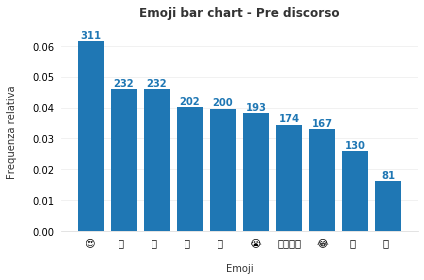

In [615]:
fig, ax = plt.subplots()

# Save the chart so we can loop through the bars below.
bars=ax.bar(
    x=np.arange(0,10),
    height=chart1['ratio'],
    tick_label=chart1.Emoji
)
# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Grab the color of the bars so we can make the
# text the same color.
bar_color = bars[0].get_facecolor()

# Add text annotations to the top of the bars.
# Note, you'll have to adjust this slightly (the 0.3)
# with different data.
for i,bar in enumerate(bars):
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.001,
      chart1.Frequency[chart1.index[i]],
      horizontalalignment='center',
      color=bar_color,
      weight='bold'
  )

ax.set_xlabel('Emoji', labelpad=15, color='#333333')
ax.set_ylabel('Frequenza relativa', labelpad=15, color='#333333')
ax.set_title('Emoji bar chart - Pre discorso', pad=15, color='#333333',
             weight='bold')

fig.tight_layout()

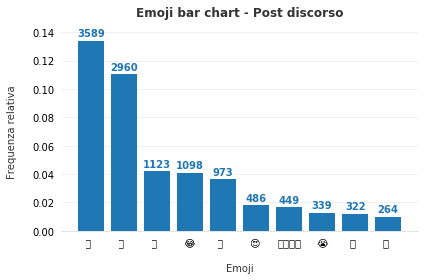

In [616]:
fig, ax = plt.subplots()

# Save the chart so we can loop through the bars below.
bars=ax.bar(
    x=np.arange(0,10),
    height=chart2['ratio'],
    tick_label=chart2.Emoji
)
# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Grab the color of the bars so we can make the
# text the same color.
bar_color = bars[0].get_facecolor()

# Add text annotations to the top of the bars.
# Note, you'll have to adjust this slightly (the 0.3)
# with different data.
for i,bar in enumerate(bars):
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.003,
      chart2.Frequency[chart2.index[i]],
      horizontalalignment='center',
      color=bar_color,
      weight='bold'
  )

ax.set_xlabel('Emoji', labelpad=15, color='#333333')
ax.set_ylabel('Frequenza relativa', labelpad=15, color='#333333')
ax.set_title('Emoji bar chart - Post discorso', pad=15, color='#333333',
             weight='bold')


fig.tight_layout()